### First let's understand our tables. All is pretty clear except of "winner" column in games.csv, so lets figure out what that is:

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# Load the CSV file into a DataFrame
df = pd.read_csv('scrabble-player-rating/turns.csv')
df2 = pd.read_csv('scrabble-player-rating/games.csv')

for i in range(1, 10):
    # Filter rows where game_id is i
    filtered_df = df[df['game_id'] == i]
    max_score_row = filtered_df.loc[filtered_df['score'].idxmax()]

    # Extract nickname and score
    nickname = max_score_row['nickname']
    score = max_score_row['score']

    game_row = df2[df2['game_id'] == i]
    game_result = game_row['winner'].iloc[0]

    print(f"Nickname: {nickname}, Score: {score}, result: {game_result}")

Nickname: stevy, Score: 429, result: 1
Nickname: Super, Score: 488, result: 1
Nickname: davidavid, Score: 440, result: 1
Nickname: BetterBot, Score: 478, result: 0
Nickname: STEEBot, Score: 427, result: 0
Nickname: STEEBot, Score: 427, result: 0
Nickname: Priya1, Score: 379, result: 1
Nickname: HastyBot, Score: 528, result: 0
Nickname: BetterBot, Score: 464, result: 0


### It is pretty clear from here that "1" means victory for the player, "0" means victory for the bot. Since this is pretty stupid I'll add a column of the player name in games.csv

In [12]:
# Load the CSV files into DataFrames
games_df = pd.read_csv('scrabble-player-rating/games.csv')
turns_df = pd.read_csv('scrabble-player-rating/turns.csv')

# Initialize new columns in games_df
games_df['bot_username'] = None
games_df['player_username'] = None

# List of bot names
bot_names = {'BetterBot', 'STEEBot', 'HastyBot'}

# Iterate over each game_id in games_df
for index, row in games_df.iterrows():
    game_id = row['game_id']
    
    # Get the first two rows for the current game_id from turns_df
    filtered_turns = turns_df[turns_df['game_id'] == game_id].head(2)
    
    # Extract nicknames
    nicknames = filtered_turns['nickname'].tolist()
    # Identify the bot and player usernames
    if nicknames[0] in bot_names:
        bot_username = nicknames[0]
        player_username = nicknames[1]
    else:
        bot_username = nicknames[1]
        player_username = nicknames[0]
    # bot_username = next(name for name in nicknames if name in bot_names)
    # player_username = next(name for name in nicknames if name not in bot_names)

    # Assign to the games_df
    games_df.at[index, 'bot_username'] = bot_username
    games_df.at[index, 'player_username'] = player_username

# # # Save the updated DataFrame to a new CSV
games_df.to_csv('scrabble-player-rating/updated_games.csv', index=False)

print("Updated games.csv with bot and player usernames.")


## Now, let's take a look at some more details: How many games have our players played?

In [31]:
df = pd.read_csv('scrabble-player-rating/updated_games.csv')

username_counts = df['player_username'].value_counts()

# Display the result
print(username_counts)
top_100_players = username_counts.head(20)
# print(top_100_players)
# print(f"Player Count: {len(username_counts)}")

player_username
BB-8            6576
hannahbanana    1884
pandorable      1759
marvin          1233
Eloquent        1041
                ... 
jolinn             1
groveringu         1
Supphakrit         1
A.Hanafi           1
kacattac           1
Name: count, Length: 1469, dtype: int64


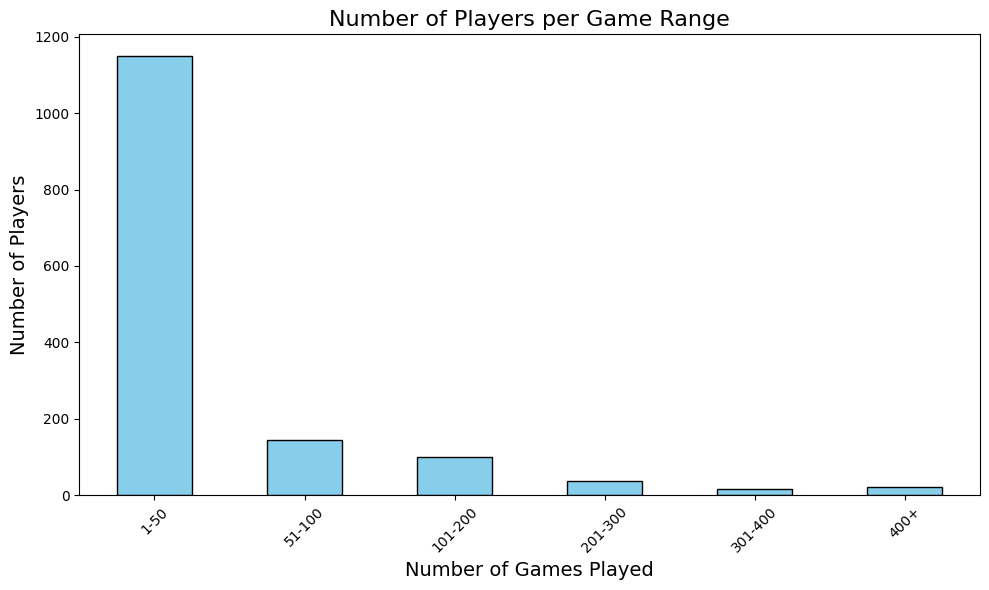

In [34]:
# Load the updated games.csv file
games_df = pd.read_csv('scrabble-player-rating/updated_games.csv')

# Count the number of games per username
username_counts = games_df['player_username'].value_counts()

# Define bins for the histogram
bins = [1, 50, 100, 200, 300, 400, username_counts.max()]

# Create labels for the bins
labels = ['1-50', '51-100', '101-200', '201-300', '301-400', '400+']

# Bin the counts
username_counts_binned = pd.cut(username_counts, bins=bins, labels=labels, right=False)

# Count the number of players in each bin
histogram_data = username_counts_binned.value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
histogram_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Players per Game Range', fontsize=16)
plt.xlabel('Number of Games Played', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### This is quite intresting- most players did not do many games at all. But comparing 50 to 1 is unfair, so lets dig deeper:

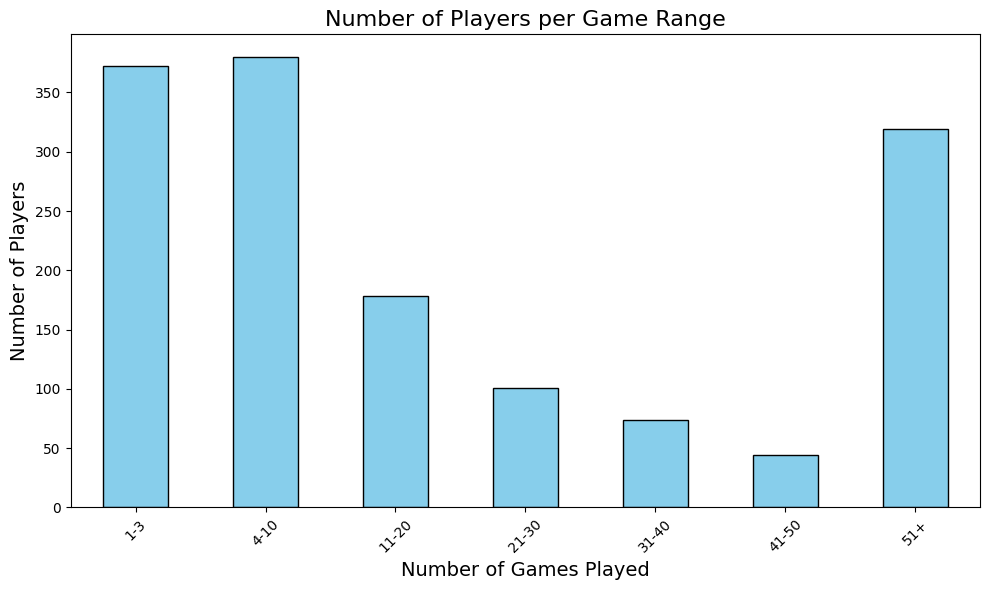

In [41]:
# Load the updated games.csv file
games_df = pd.read_csv('scrabble-player-rating/updated_games.csv')

# Count the number of games per username
username_counts = games_df['player_username'].value_counts()

# Define bins for the histogram
bins = [1, 3, 10, 20, 30, 40, 50, username_counts.max()]

# Create labels for the bins
labels = ['1-3', '4-10', '11-20', '21-30', '31-40', '41-50', '51+']

# Bin the counts
username_counts_binned = pd.cut(username_counts, bins=bins, labels=labels, right=False)

# Count the number of players in each bin
histogram_data = username_counts_binned.value_counts().sort_index()

# Plot the histogram
plt.figure(figsize=(10, 6))
histogram_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Players per Game Range', fontsize=16)
plt.xlabel('Number of Games Played', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Hypothesos: More games are correlated to higher rating- makes sense since they will be more experienced. Let's check it out:

In [57]:
train_df = pd.read_csv('scrabble-player-rating/train.csv')

#remvoing duplicates and other columns aside from name and rating:
filtered_train_df = train_df.drop_duplicates('nickname').drop(columns = ['game_id','score']) 

#removing the bots- they are not players!
bot_names = {'BetterBot', 'STEEBot', 'HastyBot'}
filtered_train_df = filtered_train_df[~filtered_train_df['nickname'].isin(bot_names)]

print(filtered_train_df)

              nickname  rating
1                stevy    1500
2            davidavid    1811
4       Inandoutworker    1473
8               HivinD    2029
11          AliSalman1    2067
...                ...     ...
98839             swee    1438
98902             Marc    1950
99403       Supphakrit    2056
100076        A.Hanafi    1837
100354        kacattac    2017

[1028 rows x 2 columns]


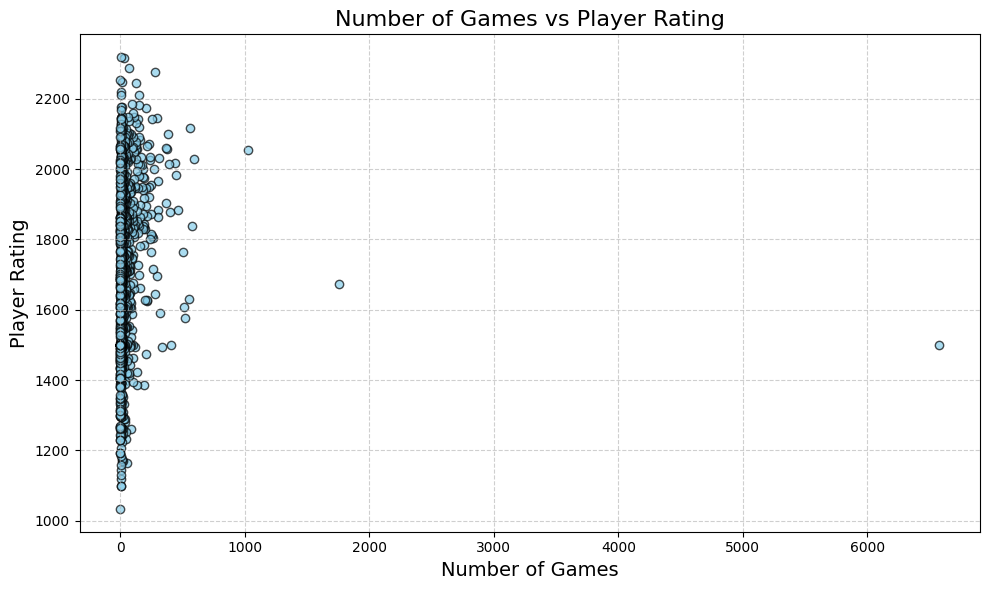

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load games.csv and calculate number of games per player
games_df = pd.read_csv('scrabble-player-rating/updated_games.csv')
username_counts = games_df['player_username'].value_counts().reset_index()
username_counts.columns = ['nickname', 'num_games']  # Rename columns for clarity

# Load train.csv and filter for unique nicknames and ratings
train_df = pd.read_csv('scrabble-player-rating/train.csv')
filtered_train_df = train_df.drop_duplicates('nickname').drop(columns=['game_id', 'score'])

# Remove bot usernames
bot_names = {'BetterBot', 'STEEBot', 'HastyBot'}
filtered_train_df = filtered_train_df[~filtered_train_df['nickname'].isin(bot_names)]

# Merge the two datasets on 'nickname'
merged_df = pd.merge(username_counts, filtered_train_df, on='nickname', how='inner')

# Plot the relationship between number of games and rating
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['num_games'], merged_df['rating'], alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Number of Games vs Player Rating', fontsize=16)
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Player Rating', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


### Data is squished due to outliers- let's apply log to spread it out more:

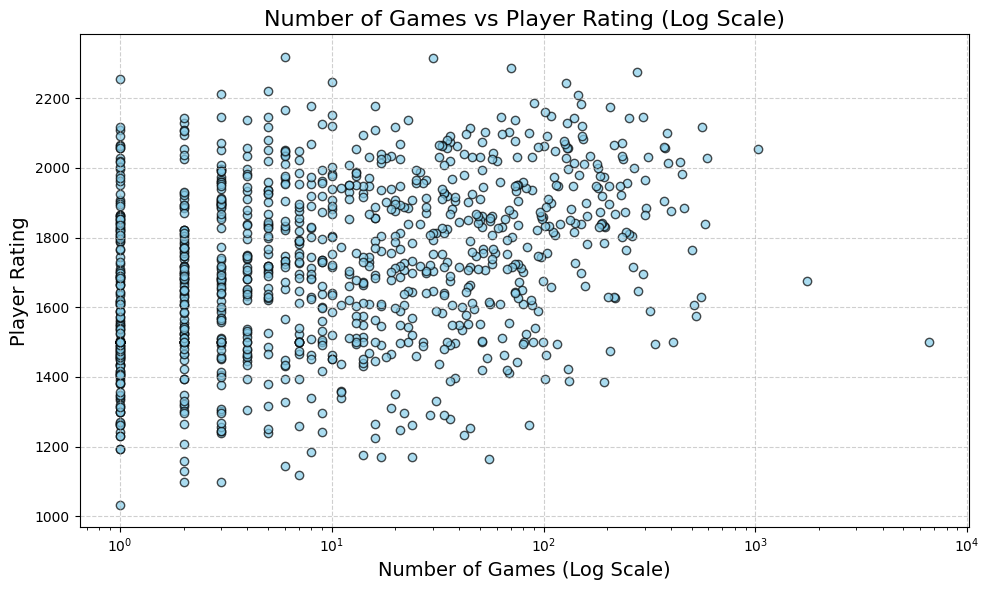

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load games.csv and calculate number of games per player
games_df = pd.read_csv('scrabble-player-rating/updated_games.csv')
username_counts = games_df['player_username'].value_counts().reset_index()
username_counts.columns = ['nickname', 'num_games']  # Rename columns for clarity

# Load train.csv and filter for unique nicknames and ratings
train_df = pd.read_csv('scrabble-player-rating/train.csv')
filtered_train_df = train_df.drop_duplicates('nickname').drop(columns=['game_id', 'score'])

# Remove bot usernames
bot_names = {'BetterBot', 'STEEBot', 'HastyBot'}
filtered_train_df = filtered_train_df[~filtered_train_df['nickname'].isin(bot_names)]

# Merge the two datasets on 'nickname'
merged_df = pd.merge(username_counts, filtered_train_df, on='nickname', how='inner')

# Plot the relationship between number of games and rating with a logarithmic x-axis
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['num_games'], merged_df['rating'], alpha=0.7, color='skyblue', edgecolor='black')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Number of Games vs Player Rating (Log Scale)', fontsize=16)
plt.xlabel('Number of Games (Log Scale)', fontsize=14)
plt.ylabel('Player Rating', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


### Surprisingly- not much correlat